# Air BNB Seattle Dataset Project by Carina Breu
## Introduction


## Research Questions

* Which kind of Appartments are offered on Airbnb for Seattle?
* Where are these appartments located?
* How do factors like beds, neighboorhood, behavior of the host affect the basic appartment price?

## Dataset Overview

In [21]:
#Import Statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import requests
import json

%matplotlib inline

## Data Preparation

In [22]:
#Import Datasets (listings, calendar and reviews)
df_list=pd.read_csv('listings.csv')
df_calendar=pd.read_csv('calendar.csv')
df_reviews=pd.read_csv('reviews.csv')

### Listings Table

In [23]:
#Show first 5 rows of listings dataset
df_list.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [24]:
# Column and datatype infos
df_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

### Calendar Table

In [25]:
#Show first rows of Calendar dataset
df_calendar.head(20)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
5,241032,2016-01-09,f,NaN
6,241032,2016-01-10,f,NaN
7,241032,2016-01-11,f,NaN
8,241032,2016-01-12,f,NaN
9,241032,2016-01-13,t,$85.00


In [26]:
#Columns and datatypes of Calendar dataset
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [27]:
#Basic statistics
df_calendar.tail()

,listing_id,date,available,price
1393565,10208623,2016-12-29,f,NaN
1393566,10208623,2016-12-30,f,NaN
1393567,10208623,2016-12-31,f,NaN
1393568,10208623,2017-01-01,f,NaN
1393569,10208623,2017-01-02,f,NaN


### Reviews Table

In [28]:
#Show first rows of Reviews dataset
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


## Modeling

## Evaluation

### Which kind of Appartments are offered on Airbnb for Seattle?

<Axes: xlabel='neighbourhood'>

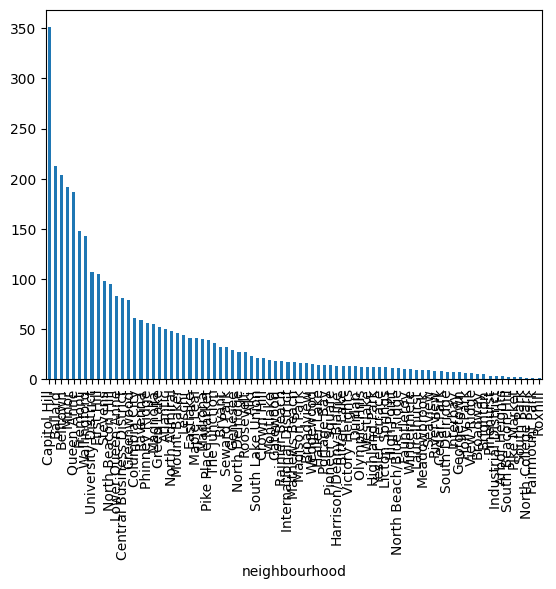

In [30]:
#Neighboorhood
df_list['neighbourhood'].value_counts().plot(kind='bar')

<Axes: xlabel='room_type'>

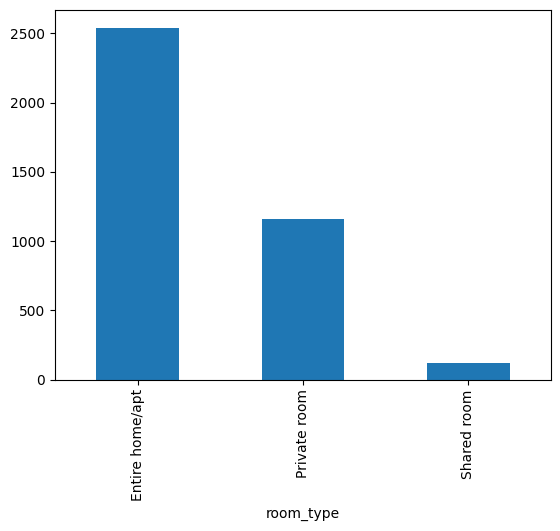

In [31]:
#Room Type
df_list['room_type'].value_counts().plot(kind='bar')

<Axes: xlabel='bedrooms'>

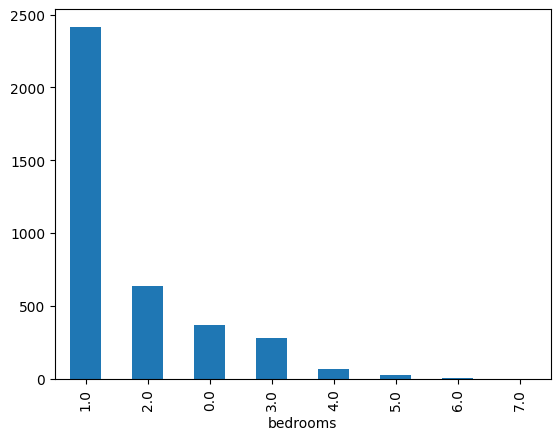

In [36]:
#Room Type
df_list['bedrooms'].value_counts().plot(kind='bar')

(0.0, 200.0)

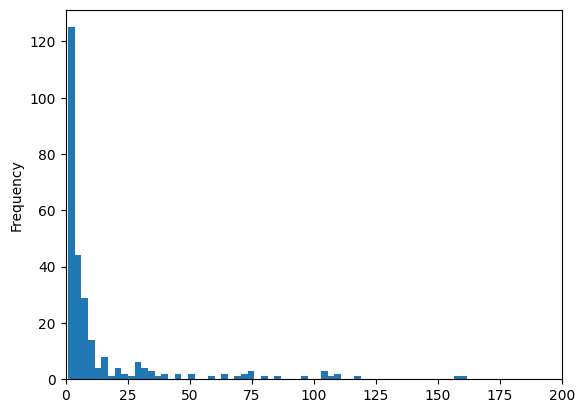

In [45]:
#Room basic Price
df_list['price'].value_counts().plot(kind='hist', bins=60)
plt.xlim(0,200)

(0.0, 600.0)

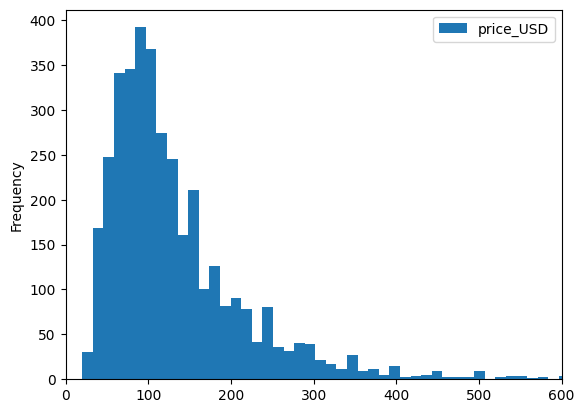

In [96]:
df_calendar[['listing_id', 'price']]#.groupby('listing_id').max('price')
df_cal_clean=df_calendar
df_cal_clean['price_USD']=df_cal_clean['price'].str.replace('$','')
df_cal_clean['price_USD']=df_cal_clean['price_USD'].str.replace(',','')
df_cal_clean['price_USD']=df_cal_clean['price_USD'].astype('float')
# Mean price distribution
df_cal_clean[['listing_id','price_USD']].groupby('listing_id').mean('price_USD').plot(kind='hist', bins=100)
plt.xlim(0,600)

<Axes: xlabel='review_scores_value'>

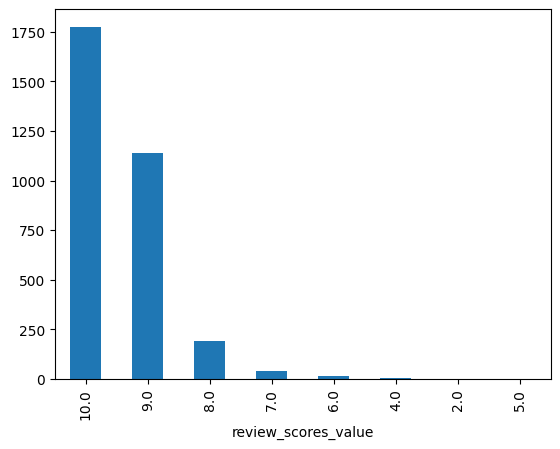

In [48]:
#Review Scores Value
df_list['review_scores_value'].value_counts().plot(kind='bar')

<Axes: xlabel='guests_included'>

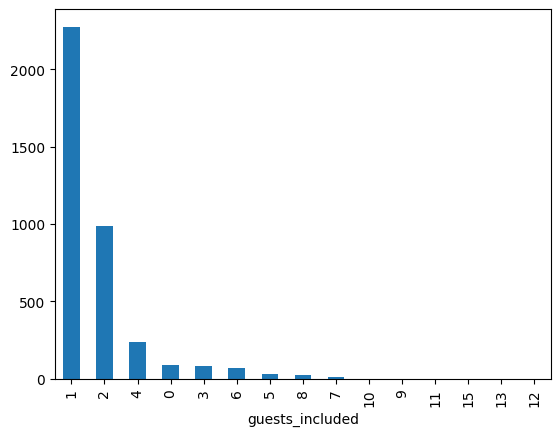

In [57]:
#Review Scores Value
df_list['guests_included'].value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

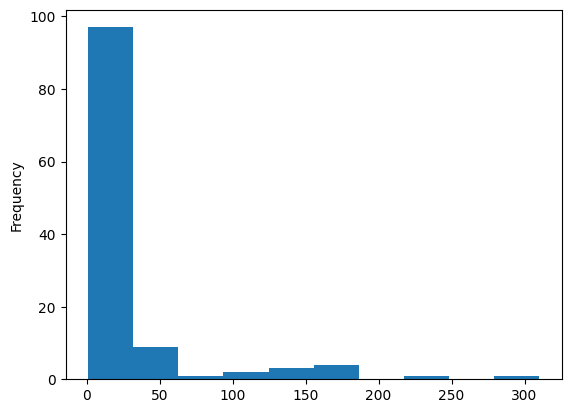

In [60]:
#Cleaning Fee
df_list['cleaning_fee'].value_counts().plot(kind='hist')

<Axes: xlabel='beds'>

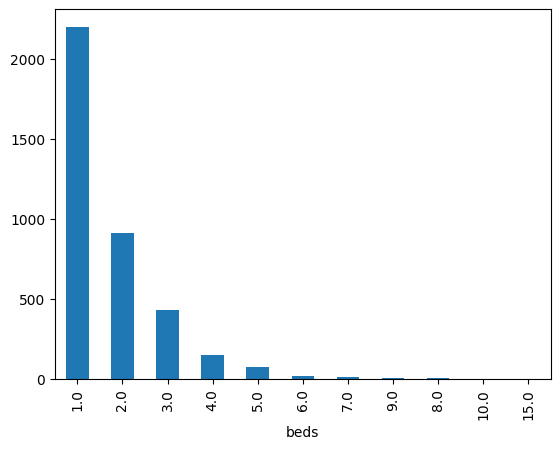

In [55]:
#Review Scores Value
df_list['beds'].value_counts().plot(kind='bar')

## Deployment